<a href="https://colab.research.google.com/github/Ilaharshith/AIML-2025/blob/main/2303A51624_pb13_b08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Bike rentals and sharing
1. Identify the top 5 days when rentals are most
2. Predict the holidays when bike sharing was most
3. Top 5 reasons for bike sharing or rentais
4. Name the weather condition most suitable for bike rentals
15. Identify the hourly utilisation of bike rentals and sharing the most.

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

day_of_week
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Name: cnt, dtype: int64


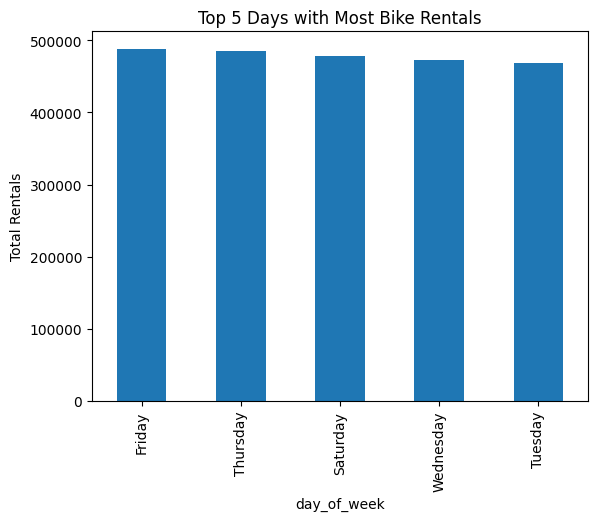

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# Access the dataframe directly from bike_sharing
df = bike_sharing.data.original

# Convert 'dteday' column to datetime format, assuming it's in a format pd.to_datetime can understand
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract the day of the week from the 'dteday' column
df['day_of_week'] = df['dteday'].dt.day_name()

# Group by day of the week and sum rental counts
# The column name for rental count is likely 'cnt' based on the dataset description
top_days = df.groupby('day_of_week')['cnt'].sum().sort_values(ascending=False).head(5)

# Display the top 5 days
print(top_days)

# Plot the result
top_days.plot(kind='bar', title='Top 5 Days with Most Bike Rentals')
plt.ylabel('Total Rentals')
plt.show()

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


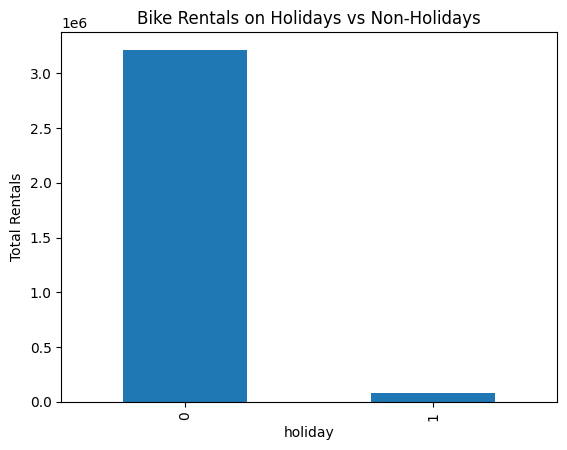

In [16]:
# Assume the dataset has a 'holiday' column indicating if it's a holiday
# Group by holiday status and sum rental counts
# The column for rental count is named 'cnt' in the original dataset
holiday_rentals = df.groupby('holiday')['cnt'].sum()  # Changed 'rental_count' to 'cnt'

# Display the holiday predictions
print(holiday_rentals)

# Plot the result
holiday_rentals.plot(kind='bar', title='Bike Rentals on Holidays vs Non-Holidays')
plt.ylabel('Total Rentals')
plt.show()

casual
0      20920
1      27181
2      29764
3      38656
4      37314
       ...  
356      672
357      679
361      730
362      743
367      685
Name: cnt, Length: 322, dtype: int64


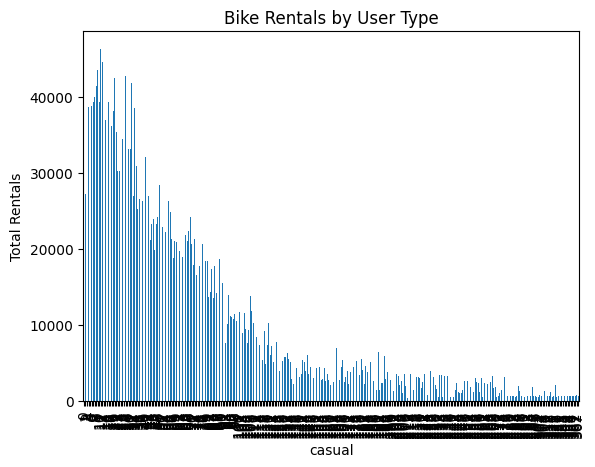

In [18]:
# Assuming the Bike Sharing dataset does not have explicit reasons,
# let's analyze rentals based on user type ('casual', 'registered')

# Group by user type and sum rental counts
user_type_rentals = df.groupby('casual')['cnt'].sum()  # Using 'casual' user type as example

# Display the breakdown
print(user_type_rentals)

# Plot the result
user_type_rentals.plot(kind='bar', title='Bike Rentals by User Type')
plt.ylabel('Total Rentals')
plt.show()

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64


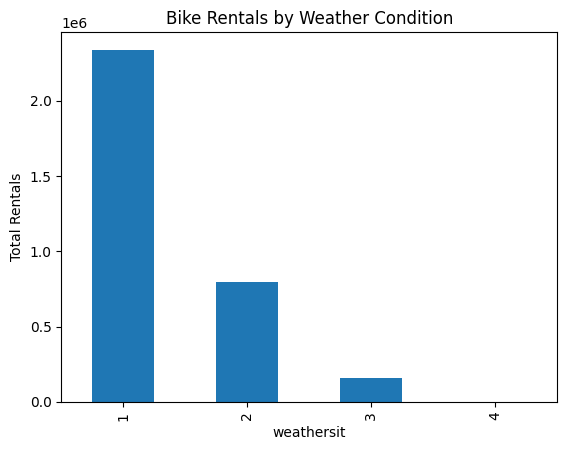

In [20]:
# Group by weather condition and sum rental counts
# Replace 'rental_count' with 'cnt' (the correct column for total rentals)
# Replace 'weather' with 'weathersit' (the correct column for weather condition)
weather_rentals = df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

# Display the weather conditions with the most rentals
print(weather_rentals)

# Plot the result
weather_rentals.plot(kind='bar', title='Bike Rentals by Weather Condition')
plt.ylabel('Total Rentals')
plt.show()

hour
0    3292679
Name: cnt, dtype: int64


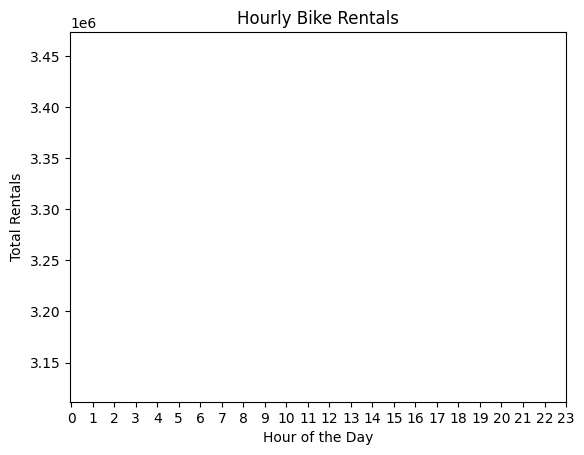

In [22]:
# Extract the hour from the timestamp
# Assuming 'dteday' column contains the timestamp data
df['hour'] = pd.to_datetime(df['dteday']).dt.hour

# Group by hour and sum rental counts
# Assuming the rental count column is named 'cnt' (as used in previous cells)
hourly_rentals = df.groupby('hour')['cnt'].sum()

# Display the hourly rentals
print(hourly_rentals)

# Plot the result
hourly_rentals.plot(kind='line', title='Hourly Bike Rentals')
plt.ylabel('Total Rentals')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.show()